# App Reviews Analysis of Philippine Banks

---

This project seeks to analyze the performace of the iOS applications of the top 3 privately owned banks in the Philippines which are Banco De Oro (BDO), Bank of the Philippine Islands (BPI), and Metropolitan Bank & Trust Company (Metrobank) using Natural Language Processing or NLP.

The data is obtained from Apple App Store reviews. This project shows how you can derive insights generated by your users and make decisions based on these insights and data.

## Goal 2: Detect the Language per Review

---

This is the start of doing our analysis using NLP, from here the NLP tasks would be sequentially done. We will use the single dataset we have created in Part 1. In this part, we will need to detect the langauge of the reviews that a user has left in the banking app of their use.

We will need to detect the language per review becuase spoiler alert, we will need to translate it later so that the models can do their tasks better becuse of the english representation of the data.

It really depends whether you want to change the language or not, there are available models in Huggingface to perform NLP tasks specific to the language of your choice, you would just have to find it. Here in my project I chose to do those NLP tasks with English language, to save myself some overhead and to possibly improve the results of these analyses.

In [1]:
!pip install fasttext

FastText is a powerful and efficient text processing library, particularly adept at language detection, which it achieves through its innovative use of subword information. By breaking down words into smaller chunks (character n-grams), FastText captures the nuances and patterns inherent to each language, even recognizing words that have not been explicitly seen before.

In [2]:
import pandas as pd
from fasttext import FastText

In [3]:
df_bank_reviews = pd.read_csv('datasets/all_app_reviews.csv', index_col='Unnamed: 0')

# Load the pre-trained language detection model
# The model is manually downloaded and placed inside the models folder
model = FastText.load_model('models/lid218e.bin')

In [4]:
df_bank_reviews.head()

,date,review,rating,isEdited,userName,title,developerResponse,bank_app
0,8/21/2023 22:42,I tried this one because of the notification i...,1,False,Dence07,Useless app,NaN,Banco De Oro
1,6/29/2023 6:55,I am quite disappointed with the BDO App’s lac...,1,False,Domansss,SMH,NaN,Banco De Oro
2,9/18/2023 14:58,I have this app for a almost a month already a...,1,False,Je123DJ,Not User Friendly,NaN,Banco De Oro
3,8/18/2023 8:18,What are these apps you keep developing? Do th...,1,False,Rieyuxel,Higher a UX Designer!,NaN,Banco De Oro
4,2/3/2022 8:57,Since i have read the reviews and its not appe...,1,False,Abner61,TO MANY BDO APPS but useless.,NaN,Banco De Oro


In [5]:
# Define a function that takes a text and returns the detected language and its probability
def detect_language(text):
    text_without_newlines = text.replace('\n', ' ')
    prediction = model.predict(text_without_newlines)
    return {"review_language": prediction[0][0].replace("__label__", ""), "review_language_prob": prediction[1][0]}

In [6]:
language_df = df_bank_reviews['review'].apply(detect_language).apply(pd.Series)

The code above creates a new dataframe that stores the results of the detected languages and its probability.

Let's concatenate those results data with the original data that we have earlier.

In [7]:
df_lang_detect = pd.concat([df_bank_reviews, language_df], axis=1)

In [8]:
df_lang_detect.head()

,date,review,rating,isEdited,userName,title,developerResponse,bank_app,review_language,review_language_prob
0,8/21/2023 22:42,I tried this one because of the notification i...,1,False,Dence07,Useless app,NaN,Banco De Oro,eng_Latn,0.999971
1,6/29/2023 6:55,I am quite disappointed with the BDO App’s lac...,1,False,Domansss,SMH,NaN,Banco De Oro,eng_Latn,0.999866
2,9/18/2023 14:58,I have this app for a almost a month already a...,1,False,Je123DJ,Not User Friendly,NaN,Banco De Oro,eng_Latn,0.999952
3,8/18/2023 8:18,What are these apps you keep developing? Do th...,1,False,Rieyuxel,Higher a UX Designer!,NaN,Banco De Oro,eng_Latn,0.999986
4,2/3/2022 8:57,Since i have read the reviews and its not appe...,1,False,Abner61,TO MANY BDO APPS but useless.,NaN,Banco De Oro,eng_Latn,0.999955


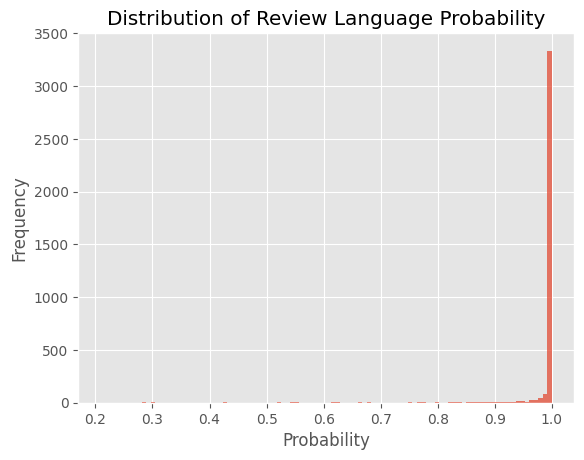

In [9]:
import matplotlib.pyplot as plt

# Set the style of the matplotlib plot
plt.style.use('ggplot')

# Plotting the histogram of the review_language_probability
plt.hist(df_lang_detect['review_language_prob'], bins=100, alpha=0.75)

# Adding titles and labels
plt.title('Distribution of Review Language Probability')
plt.xlabel('Probability')
plt.ylabel('Frequency')

# Show the plot
plt.show()

Now that we have detected all of the languages of the user reviews, let's see what languages we got in our results.

There are two approaches to this, we can either inspect for low probability language detections (1) or we can see the language labels that the model has generated (2). I will choose the number two becuase manually inspecting it using the method 1 is much more tedious.

In [10]:
# Approach #1: Filter the DataFrame where 'review_language_prob' is less than 0.40
low_prob_lang_detect = df_lang_detect[df_lang_detect['review_language_prob'] < 0.40]
low_prob_lang_detect.head()

,date,review,rating,isEdited,userName,title,developerResponse,bank_app,review_language,review_language_prob
313,9/17/2023 9:05,#NAME?,1,False,ShyneeAng,Very Annoying to use,NaN,Banco De Oro,eng_Latn,0.287864
475,12/2/2021 14:19,#NAME?,1,False,Zcxv nikotin,Severely Disappointed,NaN,Banco De Oro,eng_Latn,0.287864
996,6/29/2023 13:36,Dialogue box doesn’t fit screen,1,False,E-Brye,Stupid,NaN,Banco De Oro,ron_Latn,0.288349
1069,5/30/2022 12:11,Kakainstall lang sorry try again agad. Same la...,1,False,loka lola,Worst bank app,NaN,Banco De Oro,tgl_Latn,0.278886
1079,11/23/2021 8:48,"ASAP CHANGE your password now, if you already ...",1,False,James Hardenero,BEWARE,NaN,Banco De Oro,tgl_Latn,0.368738


We can already see that a tagalog review is marked as English (index 1016). It detected both English and Tagalog words and come up with a resulting language label with a low probability.

In [11]:
# Approach 2: View the counts of the unique values in the labelled languages by the model
df_lang_detect['review_language'].value_counts()

eng_Latn    3475
tgl_Latn     180
yue_Hant      61
kor_Hang      21
deu_Latn       8
ita_Latn       4
ilo_Latn       3
bod_Tibt       3
ceb_Latn       3
est_Latn       2
spa_Latn       2
vie_Latn       2
ron_Latn       2
por_Latn       1
ces_Latn       1
jav_Latn       1
bos_Latn       1
twi_Latn       1
nld_Latn       1
mar_Deva       1
war_Latn       1
cat_Latn       1
Name: review_language, dtype: int64

Wow, there are much more languages the model had detected than what we had imagined. We are certain that the languages in the reviews should be English (en) or Tagalog (tl) only. No model is perfect, so let's fix now the other languages that the model had detected. In the next part, we will translate all of those in English, we dont need to change the `yue_Hant` and `kor_Hang`, we will just specify the source language of the translator model to be in `yue_Hant` and `kor_Hang` later.

From `deu_Latn` up to `cat_Latn`, let's evaluate it. We need to see the whole review so that we can evaluate what language it belongs to.

In [12]:
# Set the option to None to display the full contents of each column
# We will use this to view all of the contents in a review
pd.set_option('display.max_colwidth', None)

In [13]:
non_en_tl_df = df_lang_detect[
    (df_lang_detect['review_language'] != 'eng_Latn') &
    (df_lang_detect['review_language'] != 'tgl_Latn') &
    (df_lang_detect['review_language'] != 'yue_Hant') &
    (df_lang_detect['review_language'] != 'kor_Hang')
]

In [14]:
non_en_tl_df

,date,review,rating,isEdited,userName,title,developerResponse,bank_app,review_language,review_language_prob
996,6/29/2023 13:36,Dialogue box doesn’t fit screen,1,False,E-Brye,Stupid,NaN,Banco De Oro,ron_Latn,0.288349
1004,4/28/2023 11:18,👎,1,False,art.yba,Not improved at all,NaN,Banco De Oro,bod_Tibt,0.795809
1125,12/21/2022 14:41,USELESS,1,False,awesomepats,They can’t find ways,NaN,Banco De Oro,deu_Latn,0.551272
1129,8/16/2023 4:28,slow AF,1,False,frnccs,buggy app,NaN,Banco De Oro,deu_Latn,0.898631
1154,6/2/2022 0:15,Lol,1,False,eya.eya,Can’t even login,NaN,Banco De Oro,vie_Latn,0.992187
1161,7/14/2022 4:01,😏,1,False,pqpwirye,Worst bank app,NaN,Banco De Oro,bod_Tibt,0.620446
1180,3/7/2022 4:15,Worst bank ever. Worst app ever.,1,False,Hussein C,Worst,NaN,Banco De Oro,por_Latn,0.310991
1189,6/21/2023 3:24,Useless!,1,False,lp7c,Trash App,NaN,Banco De Oro,ita_Latn,0.298450
1197,9/11/2023 7:06,Useless App,1,False,Alm_1936629,Useless App,NaN,Banco De Oro,est_Latn,0.568314
1213,2/24/2023 13:07,Useless!!!!!,1,False,du30 palpak,Useless!!,NaN,Banco De Oro,ita_Latn,0.307595


Upon evaluation, corrections can be viewed in this dataframe below.

In [15]:
df_corrected_lang = pd.read_csv('datasets/corrected_lang_detect.csv', index_col='index')
df_corrected_lang.head()

,corrected_language
index,
996,eng_Latn
1004,eng_Latn
1125,eng_Latn
1129,eng_Latn
1154,eng_Latn


Now we will need to replace the corrected_language from the above `df_corrected_lang` to the `df_lang_detect`, we will replace it by matching the index of the two dataframe. 

In [16]:
# Update the 'review_language' in df_lang_detect with 'corrected_language' from df_corrected_lang
for idx, row in df_corrected_lang.iterrows():
    df_lang_detect.loc[idx, 'review_language'] = row['corrected_language']

In [17]:
# Check the changes by looking at the first two index numbers in df_corrected_lang
df_lang_detect.loc[[996, 1004]]

,date,review,rating,isEdited,userName,title,developerResponse,bank_app,review_language,review_language_prob
996,6/29/2023 13:36,Dialogue box doesn’t fit screen,1,False,E-Brye,Stupid,NaN,Banco De Oro,eng_Latn,0.288349
1004,4/28/2023 11:18,👎,1,False,art.yba,Not improved at all,NaN,Banco De Oro,eng_Latn,0.795809


In [18]:
df_lang_detect['review_language'].value_counts()

eng_Latn    3504
tgl_Latn     187
yue_Hant      61
kor_Hang      21
ceb_Latn       1
war_Latn       1
Name: review_language, dtype: int64

For the two lone languages of `ceb_Latn` and `war_Latn`, they are literally written neither in English nor Tagalog, I really can't evaluate those becuase I don't know the language, so I retained their information that was predicted by the lid218e model.

### Saving the new data

---

Let's save the data so we can use it later for further analysis.

In [19]:
df_lang_detect.to_csv('datasets/df_wlanguages.csv')